Epoch 0
   7/1875 [..............................] - ETA: 15s - loss: 2.2851 - accuracy: 0.1786 

2023-02-23 17:09:13.424883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1868/1875 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9422

2023-02-23 17:09:25.949500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


2023-02-23 17:09:27.019858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


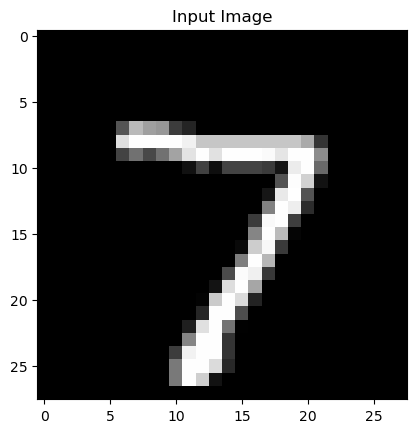

NameError: name 'img' is not defined

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='dense')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))


# Define a function to display the activations of each layer
# Display the activation outputs of the convolutional layers as images on a grid
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // 8
    display_grid = np.zeros((size * n_cols, 8 * size))
    for col in range(n_cols):
        for row in range(8):
            channel_image = layer_activation[0, :, :, col * 8 + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size:(col + 1) * size, row * size:(row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect= 'auto')    
plt.show()

# Train the model and display the activations after each epoch


